<a href="https://colab.research.google.com/github/ghraji/ee932-reinforcement-learning/blob/main/Ass1_UCB_algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cells
A notebook is a list of cells. Cells contain either explanatory text or executable code and its output. Click a cell to select it.

In [1]:
# Required Libraries
import numpy as np
import random
import matplotlib.pyplot as plt





In [2]:
# Parameters
num_experiments = 500
T = 10000
K = 2
delta = 1/4
delta_values = [0.05, 0.1, 0.2, 0.3, 0.4, 0.45]

In [62]:
## Solution for Q1 ##


# Initialize lists to store results
average_regrets_ucb = []
ucb_values = []
counts = 0
bonus = 0

# UCB constant
c_ucb = np.sqrt(3/2)

for delta in delta_values:
    total_regrets_ucb = []

    for _ in range(num_experiments):
        # Generate true means based on given values and arms
        mu0 = 0.5
        mu1 = 0.5 + delta

        # Initialize UCB algorithm parameters
        empirical_means = np.zeros(K)
        arm_counts = np.ones(K)  # Explore each arm once
        total_regret_ucb = 0

        # Run UCB algorithm after exploring each arm once
        for t in range(K + 1, T + 1):

            # Calculate UCB for each arm
            # write your code here
            # [Hint] create and update a ucb_values numpy array same as the size of emperical_means
            # ucb_values = ?

            # bonus = (np.sqrt((2 * np.log(T)) / float(arm_counts[t])))
            # bonus = (np.sqrt((2 * np.log(T)) / (arm_counts[t])))
            bonus = (np.sqrt((2 * np.log(T)) / (arm_counts)))

            ucb_values = empirical_means + bonus


            # Choose the arm with the highest UCB calculated above
            # write your code here
            # Commit to the arm with the highest empirical mean
            # store the chosen arm in the variable chosen_arm
            # this will be 0 if Arm 1 is chosen and 1 if Arm 2 is chosen
            # chosen_arm = ?
            chosen_arm = np.argmax(ucb_values)
            # Observe the reward from the environment for the chosen arm
            reward = np.random.binomial(1, mu0 if chosen_arm == 0 else mu1)

            # Update arm_counts and empirical_means for the chosen_arm
            # write your code here
            # arm_counts[chosen_arm] = ?
            # empirical_means[chosen_arm] = ?
            # Update arm_counts and empirical_means for the chosen_arm
            arm_counts[chosen_arm] += 1
            empirical_means[chosen_arm] = (empirical_means[chosen_arm] * (arm_counts[chosen_arm] - 1) + reward) / arm_counts[chosen_arm]

            # Update total regret
            # write your code here
            # update the variable total_regret_ucb
            # total_regret_ucb = ?
            total_regret_ucb += mu1 - reward

        # Record total regret for this experiment
        total_regrets_ucb.append(total_regret_ucb)

    # Calculate average regret for this delta
    average_regret_ucb = np.mean(total_regrets_ucb)
    average_regrets_ucb.append(average_regret_ucb)

# print result
print(average_regrets_ucb)

[99.54199999999518, 88.05599999998059, 62.13800000001307, 45.58599999998764, 36.181999999995575, 32.574000000007466]


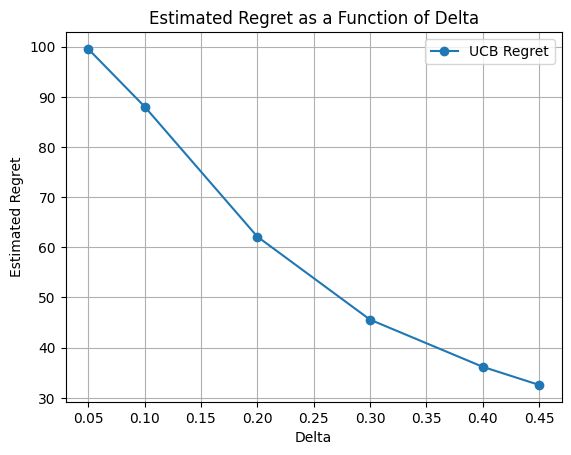

In [64]:
# Plotting
plt.plot(delta_values, average_regrets_ucb, marker='o',label = 'UCB Regret')
plt.xlabel('Delta')
plt.ylabel('Estimated Regret')
plt.title('Estimated Regret as a Function of Delta')
plt.legend()
plt.grid(True)
plt.show()

## Code cells
Below is a **code cell**. Once the toolbar button indicates CONNECTED, click in the cell to select it and execute the contents in the following ways:

* Click the **Play icon** in the left gutter of the cell;
* Type **Cmd/Ctrl+Enter** to run the cell in place;
* Type **Shift+Enter** to run the cell and move focus to the next cell (adding one if none exists); or
* Type **Alt+Enter** to run the cell and insert a new code cell immediately below it.

There are additional options for running some or all cells in the **Runtime** menu.


In [ ]:
a = 10
a

10

## Text cells
This is a **text cell**. You can **double-click** to edit this cell. Text cells
use markdown syntax. To learn more, see our [markdown
guide](/notebooks/markdown_guide.ipynb).

You can also add math to text cells using [LaTeX](http://www.latex-project.org/)
to be rendered by [MathJax](https://www.mathjax.org). Just place the statement
within a pair of **\$** signs. For example `$\sqrt{3x-1}+(1+x)^2$` becomes
$\sqrt{3x-1}+(1+x)^2.$


## Adding and moving cells
You can add new cells by using the **+ CODE** and **+ TEXT** buttons that show when you hover between cells. These buttons are also in the toolbar above the notebook where they can be used to add a cell below the currently selected cell.

You can move a cell by selecting it and clicking **Cell Up** or **Cell Down** in the top toolbar.

Consecutive cells can be selected by "lasso selection" by dragging from outside one cell and through the group.  Non-adjacent cells can be selected concurrently by clicking one and then holding down Ctrl while clicking another.  Similarly, using Shift instead of Ctrl will select all intermediate cells.

# Working with python
Colaboratory is built on top of [Jupyter Notebook](https://jupyter.org/). Below are some examples of convenience functions provided.

Long running python processes can be interrupted. Run the following cell and select **Runtime -> Interrupt execution** (*hotkey: Cmd/Ctrl-M I*) to stop execution.

In [ ]:
import time
print("Sleeping")
time.sleep(30) # sleep for a while; interrupt me!
print("Done Sleeping")

Sleeping


KeyboardInterrupt: ignored

## System aliases

Jupyter includes shortcuts for common operations, such as ls:

In [ ]:
!ls /bin

arch@      dmesg*          ls*          pwd*        true*
awk@       dnsdomainname*  lsmod*       readlink*   umount*
basename@  domainname*     mail*        red@        uname*
bash*      echo*           mkdir*       rm*         uncompress*
bunzip2@   ed@             mknod*       rmdir*      usleep*
busybox*   egrep*          mktemp*      run-parts*  ver*
bzip2@     false*          more*        sed*        which*
cat*       fgrep*          mount*       sh@         wrapper_checkpoints/
chgrp*     gawk@           mountpoint*  sleep*      zcat*
chmod*     grep*           mv*          sort@       zcmp*
chown*     gunzip*         nc*          stty*       zdiff*
cp*        gzexe*          netcat@      su*         zegrep*
cpio*      gzip*           netstat*     sync*       zfgrep*
csh@       hostname*       nice@        tailf*      zforce*
cut@       igawk@          pidof@       tar*        zgrep*
date*      kill*           ping*        tcsh@       zless*
dd*        ln*             ping6*    

That `!ls` probably generated a large output. You can select the cell and clear the output by either:

1. Clicking on the clear output button (x) in the toolbar above the cell; or
2. Right clicking the left gutter of the output area and selecting "Clear output" from the context menu.

Execute any other process using `!` with string interpolation from python variables, and note the result can be assigned to a variable:

In [ ]:
# In https://github.com/ipython/ipython/pull/10545, single quote strings are ignored
message = 'Colaboratory is great!'
foo = !unset message && echo -e '{message}\n{message}\n'$message"\n$message"
foo

['Colaboratory is great!',
 'Colaboratory is great!',
 'Colaboratory is great!',
 'Colaboratory is great!']

## Magics
Colaboratory shares the notion of magics from Jupyter. There are shorthand annotations that change how a cell's text is executed. To learn more, see [Jupyter's magics page](http://nbviewer.jupyter.org/github/ipython/ipython/blob/1.x/examples/notebooks/Cell%20Magics.ipynb).


In [ ]:
%%html
<marquee style='width: 30%; color: blue;'><b>Whee!</b></marquee>

In [ ]:
%%html
<svg xmlns="http://www.w3.org/2000/svg" viewBox="0 0 450 400" width="200" height="200">
  <rect x="80" y="60" width="250" height="250" rx="20" style="fill:red; stroke:black; fill-opacity:0.7" />
  <rect x="180" y="110" width="250" height="250" rx="40" style="fill:blue; stroke:black; fill-opacity:0.5;" />
</svg>

## Automatic completions and exploring code

Colab provides automatic completions to explore attributes of Python objects, as well as to quickly view documentation strings. As an example, first run the following cell to import the  [`numpy`](http://www.numpy.org) module.

In [ ]:
import numpy as np

If you now insert your cursor after `np` and press **Period**(`.`), you will see the list of available completions within the `np` module. Completions can be opened again by using **Ctrl+Space**.

In [ ]:
np

If you type an open parenthesis after any function or class in the module, you will see a pop-up of its documentation string:

In [ ]:
np.ndarray

The documentation can be opened again using **Ctrl+Shift+Space** or you can view the documentation for method by mouse hovering over the method name.

When hovering over the method name the `Open in tab` link will open the documentation in a persistent pane. The `View source` link will navigate to the source code for the method.

## Exception Formatting

Exceptions are formatted nicely in Colab outputs:

In [ ]:
x = 1
y = 4
z = y/(1-x)

ZeroDivisionError: 

## Rich, interactive outputs
Until now all of the generated outputs have been text, but they can be more interesting, like the chart below.

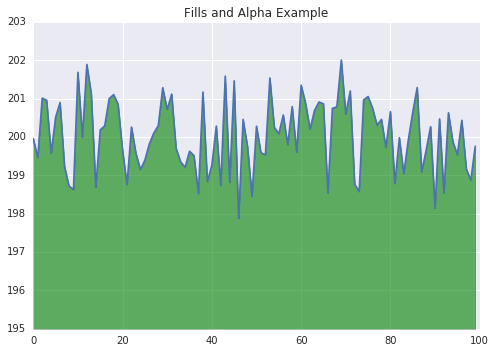

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)

plt.title("Fills and Alpha Example")
plt.show()

# Integration with Drive

Colaboratory is integrated with Google Drive. It allows you to share, comment, and collaborate on the same document with multiple people:

* The **SHARE** button (top-right of the toolbar) allows you to share the notebook and control permissions set on it.

* **File->Make a Copy** creates a copy of the notebook in Drive.

* **File->Save** saves the File to Drive. **File->Save and checkpoint** pins the version so it doesn't get deleted from the revision history.

* **File->Revision history** shows the notebook's revision history.

## Commenting on a cell
You can comment on a Colaboratory notebook like you would on a Google Document. Comments are attached to cells, and are displayed next to the cell they refer to. If you have **comment-only** permissions, you will see a comment button on the top right of the cell when you hover over it.

If you have edit or comment permissions you can comment on a cell in one of three ways:

1. Select a cell and click the comment button in the toolbar above the top-right corner of the cell.
1. Right click a text cell and select **Add a comment** from the context menu.
3. Use the shortcut **Ctrl+Shift+M** to add a comment to the currently selected cell.

You can resolve and reply to comments, and you can target comments to specific collaborators by typing *+[email address]* (e.g., `+user@domain.com`). Addressed collaborators will be emailed.

The Comment button in the top-right corner of the page shows all comments attached to the notebook.